## Import dependances

In [1]:
import phoebe as phb, numpy as np

## Generate Binary

In [2]:
bSystem = phb.default_binary()
bSystem['period@binary@component'] = 10
print(bSystem['incl'])

ParameterSet: 5 parameters
C          incl@primary@component: 90.0 deg
C        incl@secondary@component: 90.0 deg
            incl@binary@component: 90.0 deg
          incl@primary@constraint: {incl@binary@component} + {pitch@primary@component}
        incl@secondary@constraint: {incl@binary@component} + {pitch@secondary@component}


In [3]:
bSystem.add_dataset(
    'lc',
    compute_phases = phb.linspace(0, 1, 100),
    dataset = 'lc01'
)

<ParameterSet: 80 parameters | contexts: dataset, constraint, figure, compute>

In [4]:
bSystem.run_compute()

100%|██████████| 100/100 [00:00<00:00, 143.00it/s]


<ParameterSet: 3 parameters | qualifiers: fluxes, comments, times>

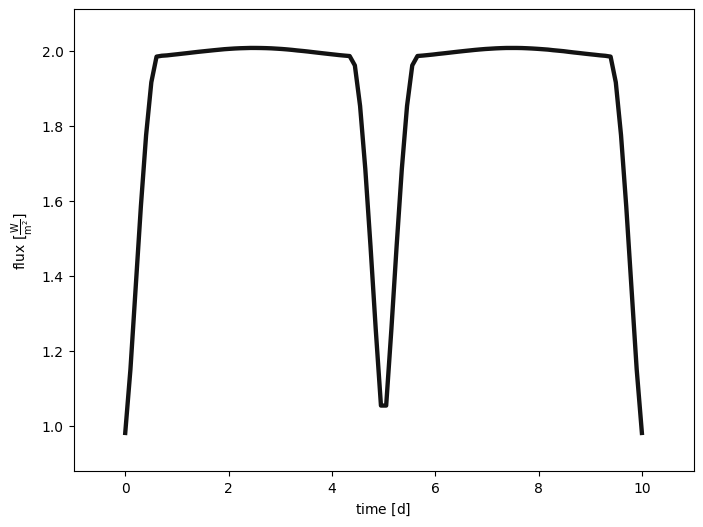

In [5]:
afig, mpltfig = bSystem.plot(show=True)

In [1]:
import sys
sys.path.append('../')
from Functions.phoebeCustom import saveSimulation


saveSimulation(bSystem, 'test')

/home/noah/miniconda3/envs/mPhysPrj/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


NameError: name 'bSystem' is not defined

In [2]:
from Functions.queryLightcurve import loadlc
lc = loadlc('test_lc.fits', '.')
lc

time,flux,flux_err
,,
Time,float32,float32
0.0,0.9826525449752808,nan
0.10101010101010102,1.1524757146835327,nan
0.20202020202020204,1.3697693347930908,nan
0.30303030303030304,1.5865647792816162,nan
0.4040404040404041,1.7763057947158813,nan
0.5050505050505051,1.916985273361206,nan
0.6060606060606061,1.9854016304016113,nan
0.7070707070707072,1.9877359867095947,nan
